[![Google Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=terminal)](https://colab.research.google.com/github/tirthajyoti/Computer_vision/blob/master/OOP_principle_deep_learning.ipynb)

# Inheritance, child class, and utility functions (OOP principles) for optimizing your deep learning work
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In this notebook, we implement a simple callback feature by defining a special class which inherits from the superclass **`keras.callbacks.Callback`**. 

The callback checks the accuracy of the trained model at the end of every epoch, and stops the training when it reaches a desired threshold. Users can set the desired threshold while instantiating the class.

We also create simple utility functions like **`build_model`** and **`compile_train_model`** to generate and train the deep learning model from user inputs. These functions can later be called from a ***higher-order optimization loop*** or ***analytics script***.

Overall, this notebook aims to illustrate how by **mixing simple [Object-oriented programming good practices](https://realpython.com/python3-object-oriented-programming/), we can add immense value to our deep learning prototype work.**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Defining the class: `myCallback`

In [3]:
class myCallback(tf.keras.callbacks.Callback):
  """
  User can pass on the desired accuracy threshold while creating an instance of the class
  """
  def __init__(self,acc_threshold=0.9,print_msg=True):
    self.acc_threshold=acc_threshold
    self.print_msg = print_msg
    
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>self.acc_threshold):
      if self.print_msg:
        print("\nReached 90% accuracy so cancelling the training!")
      self.model.stop_training = True
    else:
      if self.print_msg:
        print("\nAccuracy not high enough. Starting another epoch...\n")

### Loading the data, and simple pre-processing

In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Create a simple `myCallback` object

In [6]:
callbacks = myCallback()

### Define a function which generates a Keras model from some user input

In [7]:
def build_model(num_layers=1, architecture=[32],act_func='relu', 
                input_shape=(28,28), output_class=10):
  """
  Builds a densely connected neural network model from user input
  num_layers: Number of hidden layers
  architecture: Architecture of the hidden layers (densely connected)
  act_func: Activation function. Could be 'relu', 'sigmoid', or 'tanh'.
  input_shape: Dimension of the input vector
  output_class: Number of classes in the output vector
  """
  layers=[tf.keras.layers.Flatten(input_shape=input_shape)]
  if act_func=='relu':
    activation=tf.nn.relu
  elif act_func=='sigmoid':
    activation=tf.nn.sigmoid
  elif act_func=='tanh':
    activation=tf.nn.tanh
    
  for i in range(num_layers):
    layers.append(tf.keras.layers.Dense(architecture[i], activation=tf.nn.relu))
  layers.append(tf.keras.layers.Dense(output_class, activation=tf.nn.softmax))
  
  model = tf.keras.models.Sequential(layers)
  return model

In [8]:
model = build_model(num_layers=1,architecture=[128])

W0704 00:39:47.536827  6372 deprecation.py:506] From c:\users\tirtha\python\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compile and show summary

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train and observe how it self-terminates when the accuracy reaches the pre-set threshold

In [11]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
59744/60000 [============================>.] - ETA: 0s - loss: 0.4991 - acc: 0.8256
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 6s 92us/sample - loss: 0.4989 - acc: 0.8257
Epoch 2/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.3756 - acc: 0.8651
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 5s 87us/sample - loss: 0.3751 - acc: 0.8651
Epoch 3/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.3379 - acc: 0.8771
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 6s 106us/sample - loss: 0.3378 - acc: 0.8772
Epoch 4/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.3126 - acc: 0.8849
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 6s 95us/sample - loss: 0.3128 - acc: 0.8849
Epoch 5/10
59456/60000 [===================

### Before going further, we define a simple function to compile train a given model (to use later)

---



In [12]:
def compile_train_model(model,x_train, y_train, callbacks=None,
                        learning_rate=0.001,batch_size=1,epochs=10,verbose=0):
  """
  Compiles and trains a given Keras model with the given data. 
  Assumes Adam optimizer for this implementation.
  
  learning_rate: Learning rate for the optimizer Adam
  batch_size: Batch size for the mini-batch optimization
  epochs: Number of epochs to train
  verbose: Verbosity of the training process
  """
  
  model_copy = model
  model_copy.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  model_copy.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                 callbacks=[callbacks],verbose=verbose)
  return model_copy

### Plot the loss and accuracy over the epochs

In [13]:
e=np.array(model.history.epoch)+1 # Add one to the list of epochs which is zero-indexed
l=np.array(model.history.history['loss'])
a=np.array(model.history.history['acc'])

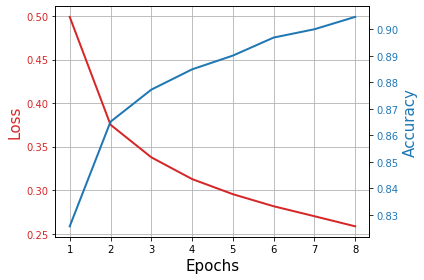

In [14]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs',fontsize=15)
ax1.set_ylabel('Loss', color=color,fontsize=15)
ax1.plot(e, l, color=color,lw=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color,fontsize=15)  # we already handled the x-label with ax1
ax2.plot(e, a, color=color,lw=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Let's define a plot utility function to use it later

In [15]:
def plot_loss_acc(model,target_acc=0.9, title=None):
  """
  Takes a deep learning model and plots the loss ans accuracy over epochs
  Users can supply a title if needed
  target_acc: The desired/ target acc. This parameter is needed for this function to show a horizontal bar.
  """
  e=np.array(model.history.epoch)+1 # Add one to the list of epochs which is zero-indexed
  l=np.array(model.history.history['loss'])
  a=np.array(model.history.history['acc'])
  
  fig, ax1 = plt.subplots()

  color = 'tab:red'
  ax1.set_xlabel('Epochs',fontsize=15)
  ax1.set_ylabel('Loss', color=color,fontsize=15)
  ax1.plot(e, l, color=color,lw=2)
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.grid(True)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('Accuracy', color=color,fontsize=15)  # we already handled the x-label with ax1
  ax2.plot(e, a, color=color,lw=2)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  if title!=None:
    plt.title(title)
  plt.hlines(y=target_acc,xmin=1,xmax=e.max(),colors='k', linestyles='dashed',lw=3)
  plt.show()

### What if the model was simplified

In [16]:
model = build_model(num_layers=1,architecture=[32])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
59744/60000 [============================>.] - ETA: 0s - loss: 0.5520 - acc: 0.8108
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 5s 84us/sample - loss: 0.5517 - acc: 0.8109
Epoch 2/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.4169 - acc: 0.8537
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 6s 96us/sample - loss: 0.4167 - acc: 0.8537
Epoch 3/10
59584/60000 [============================>.] - ETA: 0s - loss: 0.3819 - acc: 0.8653
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 6s 96us/sample - loss: 0.3823 - acc: 0.8652
Epoch 4/10
59296/60000 [============================>.] - ETA: 0s - loss: 0.3630 - acc: 0.8700
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 6s 94us/sample - loss: 0.3631 - acc: 0.8701
Epoch 5/10
59264/60000 [====================

---
So the training ran for all 10 epochs and did not get a chance to self-terminate early using the callbacks.

However, the model was simplified, so may be 10 epochs consumed less computational resource than a complex model. We can write simple code to find out what kind of trade-off is going on...

---

### How the model architecture complexity impacts the minimum  epochs it takes to reach desired accuracy

This is a question for ***higher order optimization*** or a ***visual analytics study*** around the core deep learning model. And, now we can take advantage of all the functions and classes, we defined earlier, and bring them all together to accomlish this higher order task.

Consequently, our final code will be super compact but it will generate the same interesting plots of loss and accuracy over epochs, that we show above, for a variety of accuracy threshold values and neural network architectures. 

This will give an user the ability to to use minimal amount of code to produce visual analytics about the choice of performance metric (accuracy in this case), and neural network architecture. **This is the first step towards building an optimized machine learning system.**

> **NOTE**: For brevity, we just show the cases with a single hidden layer and varying number of neurons, but we can easily extend it for multiple layers, as the generic `build_model` function is able to generate models with arbitrary number of layers and neurons (as long as they are densely connected).

### Generate cases corresponding to various accuracy threshold values and number of neurons

In [18]:
from itertools import product

accuracy_desired = [0.85,0.9,0.95]
num_neurons = [16,32,64,128]

cases = list(product(accuracy_desired,num_neurons))

print("So, the cases we are considering are as follows...\n")
for i,c in enumerate(cases):
  print("Accuracy target {}, number of neurons: {}".format(c[0],c[1]))
  if (i+1)%4==0 and (i+1)!=len(cases):
    print("-"*50)

So, the cases we are considering are as follows...

Accuracy target 0.85, number of neurons: 16
Accuracy target 0.85, number of neurons: 32
Accuracy target 0.85, number of neurons: 64
Accuracy target 0.85, number of neurons: 128
--------------------------------------------------
Accuracy target 0.9, number of neurons: 16
Accuracy target 0.9, number of neurons: 32
Accuracy target 0.9, number of neurons: 64
Accuracy target 0.9, number of neurons: 128
--------------------------------------------------
Accuracy target 0.95, number of neurons: 16
Accuracy target 0.95, number of neurons: 32
Accuracy target 0.95, number of neurons: 64
Accuracy target 0.95, number of neurons: 128


### Run the cases and generate plot (with suitable titles)

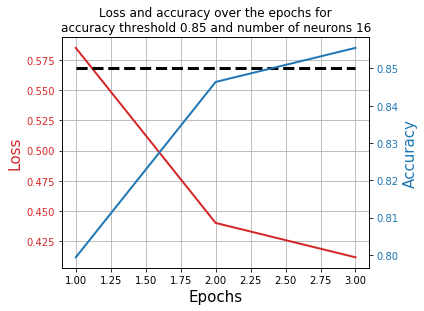

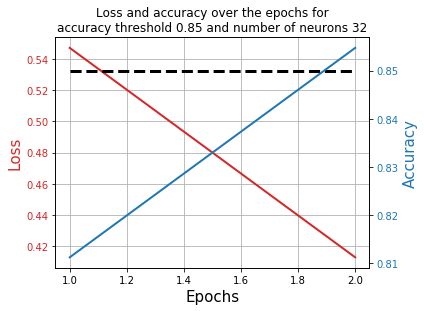

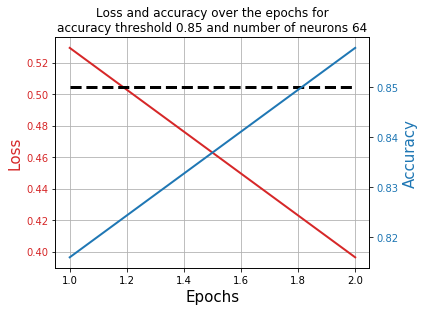

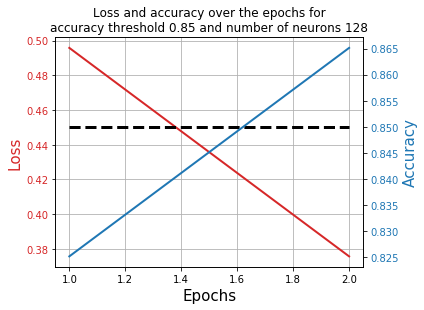

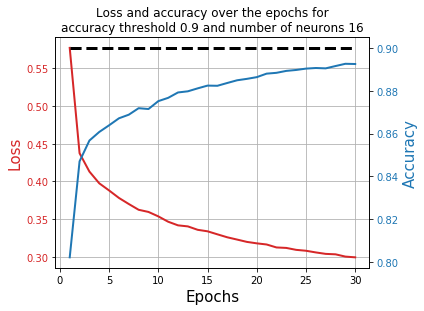

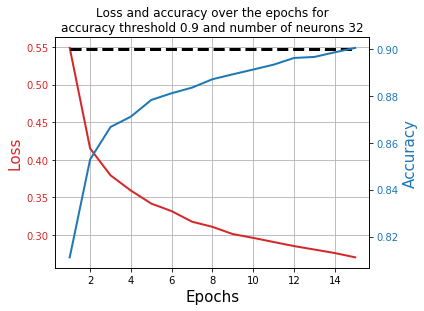

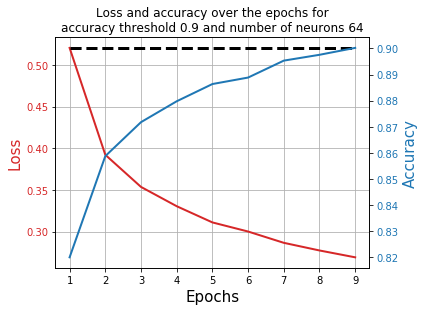

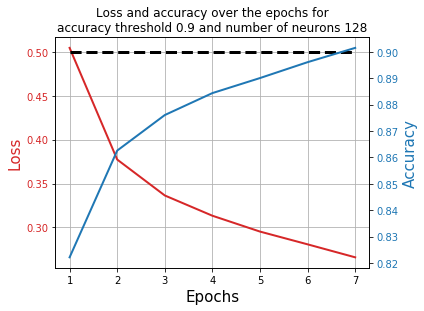

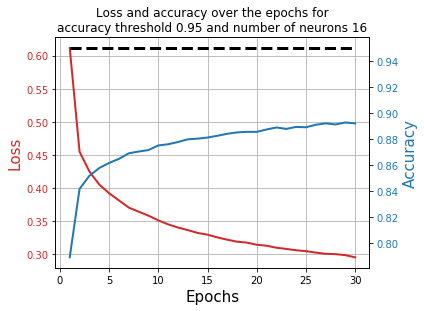

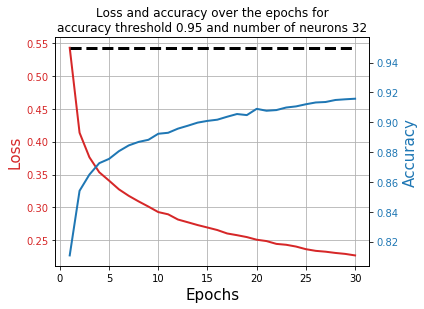

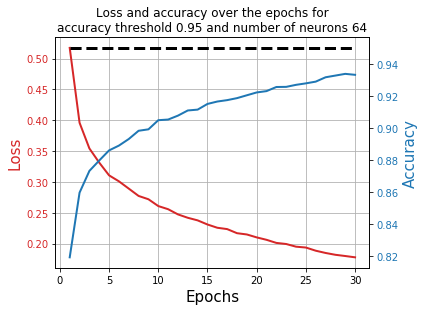

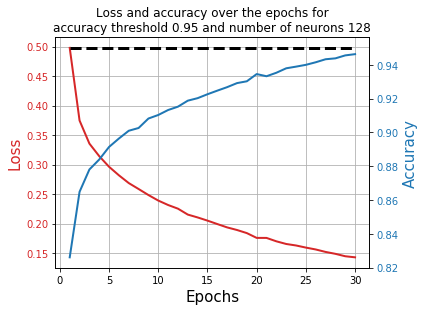

In [19]:
for c in cases:
  # Create a mycallback class with the specific accuracy target 
  callbacks = myCallback(c[0], print_msg=False)
  
  # Build a model with a specific number of neurons
  model = build_model(num_layers=1,architecture=[c[1]])
  
  # Compile and train the model passing on the callback class,choose suitable batch size and a max epoch limit
  model = compile_train_model(model, x_train,y_train,callbacks=callbacks,
                              batch_size=32,epochs=30)
  
  # Construct a suitable title string for displaying the results properly
  title = "Loss and accuracy over the epochs for\naccuracy threshold \
  {} and number of neurons {}".format(c[0],c[1])
  
  # Use the plotting utility function, pass on the accuracy target, 
  # trained model, and the custom title string
  plot_loss_acc(model,target_acc=c[0],title=title)